In [119]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression

In [120]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [7.8, 5.85]
plt.rcParams['font.size'] = 14

In [121]:
data=pd.read_excel("Dades_seleccionades.xlsx")

In [122]:
df=data

In [123]:
df.describe()

,PROVINCIA,LLOC_NAIX,EDAT
count,5713.000000,5713.000000,5713.000000
mean,1.560651,1.371959,50.347453
std,1.085881,0.705693,46.828781
min,1.000000,1.000000,16.000000
25%,1.000000,1.000000,36.000000
50%,1.000000,1.000000,51.000000
75%,1.000000,1.000000,63.000000
max,4.000000,3.000000,3333.000000


In [124]:
#Traiem els valors perduts
df_clean=df[~df.apply(lambda row: row.astype(str).str.contains("valor", case=False, na=False).any(), axis=1)]

In [125]:
#Comprovació que no hi hagi valors estranys
columns=[]
columns=[n for n in df.columns]
for n in columns:
    print(n)
    print(df_clean[n].unique())
    print("")

PROVINCIA
[1 4 2]

LLOC_NAIX
[3 1 2]

SEXE
[1 2]

EDAT
[ 46  52  33  17  68  30  74  71  65  20  50  44  42  56  28  54  24  18
  38  76  35  48  45  21  19  16  69  59  55  51  49  36  22  66  53  47
  25  29  72  43  41  34  31  26  87  63  60  83  58  57  80  75  73  67
  64  39  32  27  61  40  23  77  62  37  82  79  70  90  88  78  86  91
  89  81 102  84  85  92]

ESTAT_CIVIL_2
[1 2 6 5 4]

FILLS
[3 2 0 1 8 4 5 6 9]

LLENGUA_IDENTIFICACIO
[2 1 3]

SIT_LAB_1_2
[1 2]

ESTUDIS_1_6
[6 4 1 2 5 3 7]

INTERES_POL
[1 2 3 4]

ACORD_ROLS_GENERE1
[5 2 1 4 3]

ACORD_ROLS_GENERE2
[1 2 3 5 4]

ACORD_ROLS_GENERE3
[2 4 3 5 1]

ACORD_ROLS_GENERE4
[3 1 2 4 5]

ACORD_ROLS_GENERE5
[3 5 1 4 2]

ACCEPTACIO_ROLS_GENERE1
[1 3 4 2]

ACCEPTACIO_ROLS_GENERE2
[4 2 1 3]

ACCEPTACIO_ROLS_GENERE3
[4 2 3 1]

ACCEPTACIO_ROLS_GENERE4
[2 3 4 1]

ACORD_FEMINISME_IGUALTAT
[2 1 3]

ACORD_FEMINISME_JUSTICIA
[4 2 1 3 5]

ACORD_FEMINISME_CLAU
[4 2 3 1 5]

ACORD_FEMINISME_HOMES
[1 2 3 5 4]

SATISFACCIO_GLOBAL
[9 8 7 6 4

In [126]:
#Canviem tots els valors a integers
df_clean = df_clean.astype(int)

In [127]:
df_clean.describe()

,PROVINCIA,LLOC_NAIX,SEXE,EDAT,ESTAT_CIVIL_2,FILLS,LLENGUA_IDENTIFICACIO,SIT_LAB_1_2,ESTUDIS_1_6,INTERES_POL,...,ACORD_FEMINISME_CLAU,ACORD_FEMINISME_HOMES,SATISFACCIO_GLOBAL,CURA_ME0R_7DIES_FILLS,CURA_ME0R_7DIES_FAMILIA,CURA_ME0R_7DIES_AMICS,CURA_ME0R_7DIES_0,RELIGIO,GENERE,CLASSE_SOCIAL_SUBJECTIVA_1_7
count,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000,...,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000
mean,1.541457,1.338013,1.483444,46.915232,2.884503,1.131126,1.475762,1.301987,4.686623,1.984371,...,1.621722,1.617483,7.364238,0.268344,0.140132,0.026225,0.579603,2.918146,1.486093,3.056954
std,1.070793,0.686129,0.499792,16.236387,2.261029,1.097293,0.606783,0.459180,1.580910,0.784737,...,0.865309,0.923354,1.631709,0.443157,0.347170,0.159825,0.493688,1.864210,0.501989,1.563762
min,1.000000,1.000000,1.000000,16.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,34.000000,1.000000,0.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
50%,1.000000,1.000000,1.000000,48.000000,2.000000,1.000000,1.000000,1.000000,5.000000,2.000000,...,1.000000,1.000000,8.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,2.000000
75%,1.000000,1.000000,2.000000,59.000000,6.000000,2.000000,2.000000,2.000000,6.000000,2.000000,...,2.000000,2.000000,8.000000,1.000000,0.000000,0.000000,1.000000,5.000000,2.000000,5.000000
max,4.000000,3.000000,2.000000,102.000000,6.000000,9.000000,3.000000,2.000000,7.000000,4.000000,...,5.000000,5.000000,10.000000,1.000000,1.000000,1.000000,1.000000,7.000000,3.000000,7.000000


In [128]:
#Introduïm la variable target
df_clean['target']=df_clean['ACORD_FEMINISME_IGUALTAT']
df_clean

,PROVINCIA,LLOC_NAIX,SEXE,EDAT,ESTAT_CIVIL_2,FILLS,LLENGUA_IDENTIFICACIO,SIT_LAB_1_2,ESTUDIS_1_6,INTERES_POL,...,ACORD_FEMINISME_HOMES,SATISFACCIO_GLOBAL,CURA_ME0R_7DIES_FILLS,CURA_ME0R_7DIES_FAMILIA,CURA_ME0R_7DIES_AMICS,CURA_ME0R_7DIES_0,RELIGIO,GENERE,CLASSE_SOCIAL_SUBJECTIVA_1_7,target
599,1,3,1,46,1,3,2,1,6,1,...,1,9,1,0,0,0,1,1,7,2
600,1,1,1,52,1,2,1,1,6,2,...,2,8,0,0,0,1,4,1,7,1
601,4,3,1,33,2,0,3,1,4,3,...,3,7,0,0,0,1,2,1,7,2
605,4,1,2,17,6,0,1,2,4,2,...,1,9,0,0,0,1,2,2,7,1
606,1,3,2,68,1,2,2,2,6,2,...,1,6,0,0,0,1,6,2,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5704,1,1,1,33,6,0,2,1,2,1,...,1,7,0,0,0,1,7,1,1,1
5705,1,1,1,33,6,0,1,1,4,2,...,4,7,0,0,0,1,1,1,1,3
5706,4,1,1,32,1,1,2,1,6,2,...,1,10,1,0,0,0,5,1,1,1
5708,4,1,1,29,6,0,1,1,5,3,...,1,7,0,0,0,1,4,1,1,1


In [129]:
#Escalem la variable edat
for c in df_clean.columns:
  if c == 'EDAT' or c== 'SATISFACCIO_GLOBAL':
    df_clean["{}_scaled".format(c)] = (df_clean[c] - df_clean[c].mean()) / df_clean[c].std()

In [130]:
#Traiem el target de les variables explicatives
#També trec totes aquelles variables que contenen 'acord' perquè no tenia gaire sentit predir segons aquestes variables,
#són més importants totes aquelles com edat, gènere, etc.

explanatory_variables1 = [c for c in df_clean.columns if 'target' not in c and 'ACORD' not in c and 'ACCEPTACIO' not in c]
explanatory_variables1.remove('EDAT')
explanatory_variables1.remove('SATISFACCIO_GLOBAL')
explanatory_variables1.remove('SEXE')
#explanatory_variables.remove('ACORD_FEMINISME_IGUALTAT')

print(explanatory_variables1)
target_variable = "target"

['PROVINCIA', 'LLOC_NAIX', 'ESTAT_CIVIL_2', 'FILLS', 'LLENGUA_IDENTIFICACIO', 'SIT_LAB_1_2', 'ESTUDIS_1_6', 'INTERES_POL', 'CURA_ME0R_7DIES_FILLS', 'CURA_ME0R_7DIES_FAMILIA', 'CURA_ME0R_7DIES_AMICS', 'CURA_ME0R_7DIES_0', 'RELIGIO', 'GENERE', 'CLASSE_SOCIAL_SUBJECTIVA_1_7', 'EDAT_scaled', 'SATISFACCIO_GLOBAL_scaled']


In [131]:
df_clean['target2']=df_clean['target']
df_clean.loc[df_clean['target2'] == 2, 'target2'] = 0
df_clean.loc[df_clean['target2'] == 3, 'target2'] = 0
df_clean.describe()

df_clean['target']=df_clean['target2']
print(df_clean['target'])


599     0
600     1
601     0
605     1
606     1
       ..
5704    1
5705    0
5706    1
5708    1
5711    1
Name: target, Length: 3775, dtype: int64


In [135]:
len(df_clean.loc[df_clean['target']==0])

741

In [90]:
X = df_clean[explanatory_variables1]
y = df_clean[target_variable]

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [92]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (3020, 17)
X_test shape: (755, 17)
y_train shape: (3020,)
y_test shape: (755,)


In [93]:
#Faig el que fa a la pràctica de gradient_boosting per trobar els millors paràmetres
parameters = {"max_depth": [n for n in range(1,10)], "min_samples_split": [n for n in range(2,10)]}
#parameters = {"max_depth": [None], "min_samples_split": [n for n in range(2,10)]}


In [94]:
gb = DecisionTreeClassifier()
model = GridSearchCV(gb, parameters, verbose=10,scoring='accuracy').fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5; 1/72] START max_depth=1, min_samples_split=2...........................
[CV 1/5; 1/72] END max_depth=1, min_samples_split=2;, score=0.805 total time=   0.0s
[CV 2/5; 1/72] START max_depth=1, min_samples_split=2...........................
[CV 2/5; 1/72] END max_depth=1, min_samples_split=2;, score=0.803 total time=   0.0s
[CV 3/5; 1/72] START max_depth=1, min_samples_split=2...........................
[CV 3/5; 1/72] END max_depth=1, min_samples_split=2;, score=0.803 total time=   0.0s
[CV 4/5; 1/72] START max_depth=1, min_samples_split=2...........................
[CV 4/5; 1/72] END max_depth=1, min_samples_split=2;, score=0.803 total time=   0.0s
[CV 5/5; 1/72] START max_depth=1, min_samples_split=2...........................
[CV 5/5; 1/72] END max_depth=1, min_samples_split=2;, score=0.803 total time=   0.0s
[CV 1/5; 2/72] START max_depth=1, min_samples_split=3...........................
[CV 1/5; 2/72] END max_dept

In [95]:
print("Best parameters set found on development set:")
print(model.best_params_)
print("")

print("Grid scores on development set:")
means = model.cv_results_["mean_test_score"]
stds = model.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, model.cv_results_["params"]):
  print("{:.4f} +- {:.4f} for {}".format(mean, std, params))

Best parameters set found on development set:
{'max_depth': 1, 'min_samples_split': 2}

Grid scores on development set:
0.8033 +- 0.0007 for {'max_depth': 1, 'min_samples_split': 2}
0.8033 +- 0.0007 for {'max_depth': 1, 'min_samples_split': 3}
0.8033 +- 0.0007 for {'max_depth': 1, 'min_samples_split': 4}
0.8033 +- 0.0007 for {'max_depth': 1, 'min_samples_split': 5}
0.8033 +- 0.0007 for {'max_depth': 1, 'min_samples_split': 6}
0.8033 +- 0.0007 for {'max_depth': 1, 'min_samples_split': 7}
0.8033 +- 0.0007 for {'max_depth': 1, 'min_samples_split': 8}
0.8033 +- 0.0007 for {'max_depth': 1, 'min_samples_split': 9}
0.8033 +- 0.0007 for {'max_depth': 2, 'min_samples_split': 2}
0.8033 +- 0.0007 for {'max_depth': 2, 'min_samples_split': 3}
0.8033 +- 0.0007 for {'max_depth': 2, 'min_samples_split': 4}
0.8033 +- 0.0007 for {'max_depth': 2, 'min_samples_split': 5}
0.8033 +- 0.0007 for {'max_depth': 2, 'min_samples_split': 6}
0.8033 +- 0.0007 for {'max_depth': 2, 'min_samples_split': 7}
0.8033 +- 0.

[Text(0.5615808823529411, 0.9285714285714286, 'GENERE <= 1.5\ngini = 0.316\nsamples = 3020\nvalue = [594, 2426]'),
 Text(0.3272058823529412, 0.7857142857142857, 'EDAT_scaled <= 0.652\ngini = 0.386\nsamples = 1573\nvalue = [411, 1162]'),
 Text(0.4443933823529411, 0.8571428571428572, 'True  '),
 Text(0.20588235294117646, 0.6428571428571429, 'ESTUDIS_1_6 <= 5.5\ngini = 0.432\nsamples = 1069\nvalue = [338, 731]'),
 Text(0.11764705882352941, 0.5, 'EDAT_scaled <= 0.098\ngini = 0.469\nsamples = 581\nvalue = [218, 363]'),
 Text(0.058823529411764705, 0.35714285714285715, 'INTERES_POL <= 2.5\ngini = 0.484\nsamples = 401\nvalue = [165, 236]'),
 Text(0.029411764705882353, 0.21428571428571427, 'EDAT_scaled <= 0.036\ngini = 0.467\nsamples = 259\nvalue = [96, 163]'),
 Text(0.014705882352941176, 0.07142857142857142, 'gini = 0.459\nsamples = 249\nvalue = [89, 160]'),
 Text(0.04411764705882353, 0.07142857142857142, 'gini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.08823529411764706, 0.21428571428571

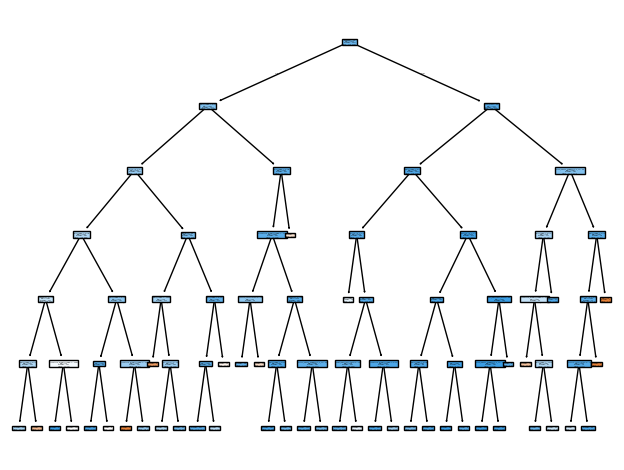

In [96]:
#Model a entrenar. Estan posats com a paràmetres els millors en teoria per lo de dalt, però si vols veure
#importància de les variables posa max_depth=5. model.best_params_['max_depth']
model2 = DecisionTreeClassifier(max_depth=6, min_samples_split=30).fit(X_train, y_train)
plot_tree(model2,feature_names=X_train.columns,filled=True)


In [97]:
y_pred_train = model2.predict(X_train)

In [98]:
y_pred_test = model2.predict(X_test)

In [99]:
acc_train = accuracy_score(y_train, y_pred_train)
acc_train

0.8105960264900662

In [100]:
acc_test = accuracy_score(y_test, y_pred_test)
acc_test

0.7960264900662252

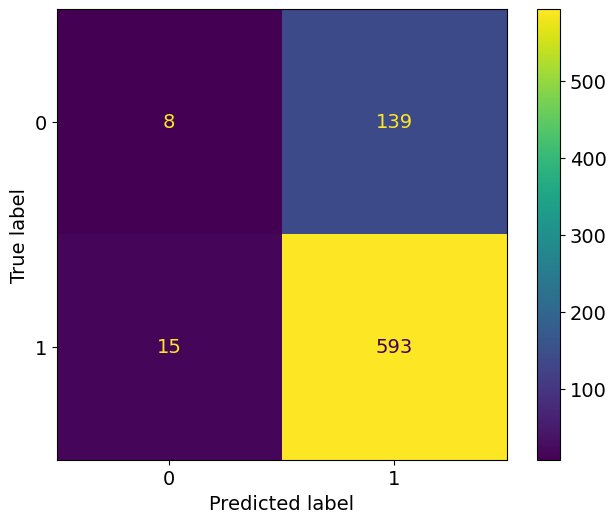

In [101]:
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


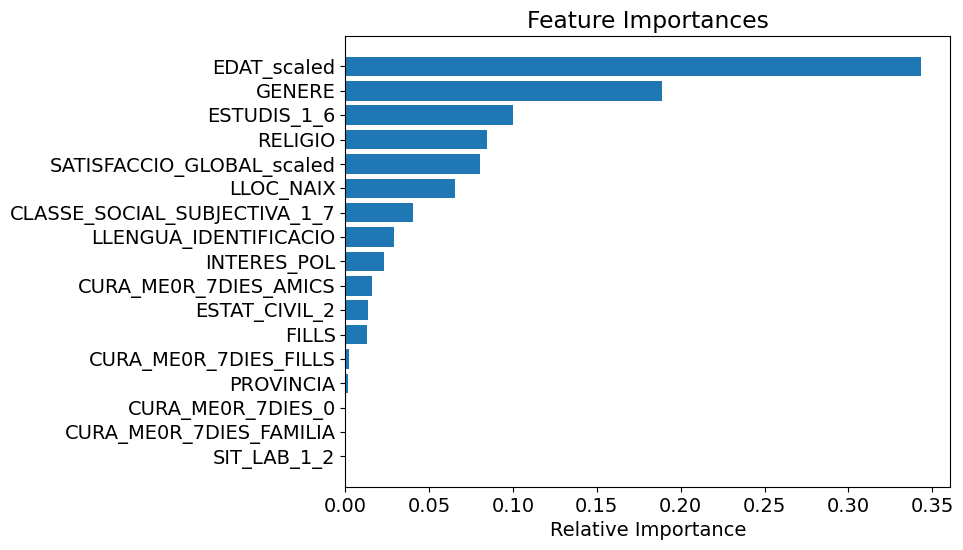

In [102]:
#Variables més importants. Ho haurem d'utilitzar per discutir resultats

importances = model2.feature_importances_
indices = np.argsort(importances)

plt.barh(range(len(indices)), importances[indices], align='center')
plt.title("Feature Importances")
plt.yticks(range(len(indices)), [explanatory_variables1[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

________________________________________

Regressió logística

In [103]:
target_variable='target2'
X = df_clean[explanatory_variables1]
y = df_clean[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



In [104]:
gb = LogisticRegression(penalty='l2')
parameters={'C':[1,0.1,0.01,0.001],'max_iter':range(100,2000,100)}
model3 = GridSearchCV(gb, parameters, verbose=10,scoring='accuracy').fit(X_train, y_train)

Fitting 5 folds for each of 76 candidates, totalling 380 fits
[CV 1/5; 1/76] START C=1, max_iter=100..........................................
[CV 1/5; 1/76] END ...........C=1, max_iter=100;, score=0.810 total time=   0.0s
[CV 2/5; 1/76] START C=1, max_iter=100..........................................
[CV 2/5; 1/76] END ...........C=1, max_iter=100;, score=0.801 total time=   0.1s
[CV 3/5; 1/76] START C=1, max_iter=100..........................................
[CV 3/5; 1/76] END ...........C=1, max_iter=100;, score=0.796 total time=   0.1s
[CV 4/5; 1/76] START C=1, max_iter=100..........................................
[CV 4/5; 1/76] END ...........C=1, max_iter=100;, score=0.805 total time=   0.0s
[CV 5/5; 1/76] START C=1, max_iter=100..........................................
[CV 5/5; 1/76] END ...........C=1, max_iter=100;, score=0.796 total time=   0.0s
[CV 1/5; 2/76] START C=1, max_iter=200..........................................
[CV 1/5; 2/76] END ...........C=1, max_iter=200

In [105]:
print("Best parameters set found on development set:")
print(model3.best_params_)
print("")

Best parameters set found on development set:
{'C': 0.001, 'max_iter': 100}



In [106]:
c=1
max_Iter=model3.best_params_['max_iter']
model4 = LogisticRegression(penalty="l2",C=c, max_iter=max_Iter).fit(X_train, y_train)
model5 = LogisticRegression(penalty="l1",C=c, max_iter=max_Iter,solver='liblinear').fit(X_train, y_train)

In [107]:
print(model4.coef_)
print(model5.coef_)

[[-0.05303978 -0.24735867  0.042295    0.04360345 -0.15158359  0.00213569
   0.08673693 -0.23274252 -0.43896845 -0.06112515 -0.6153826  -0.16380513
   0.12173967  1.04139264  0.02564361  0.32337211  0.10067626]]
[[-0.04724356 -0.2440224   0.04334204  0.0437044  -0.1389967   0.01405463
   0.09092233 -0.22256728 -0.27848627  0.06373253 -0.47738579  0.
   0.12254102  1.04980528  0.02739628  0.32779616  0.09834138]]


In [108]:
y_pred_proba = model4.predict_proba(X_test)[:,1]
y_pred_proba
threshold = 0.7
y_pred = (y_pred_proba > threshold).astype(int)


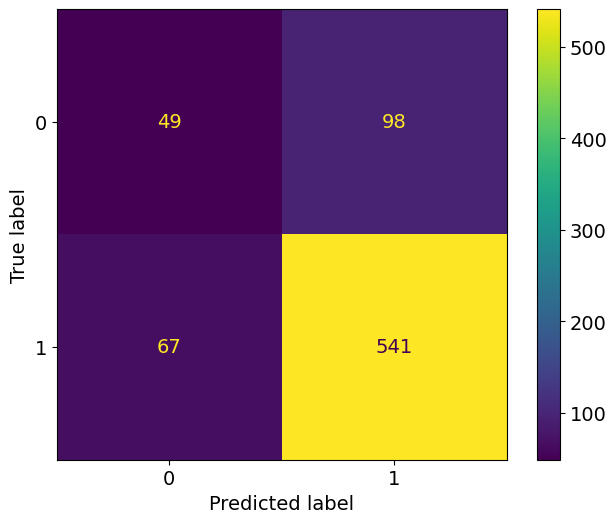

In [109]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [110]:
acc = accuracy_score(y_test, y_pred)
acc

0.7814569536423841

In [111]:
pr = precision_score(y_test, y_pred,average='binary')
pr

np.float64(0.8466353677621283)

In [112]:
rec = recall_score(y_test, y_pred,average='binary')
rec

np.float64(0.8898026315789473)

755 755
0.7827814569536424
0.846875
0.8914473684210527


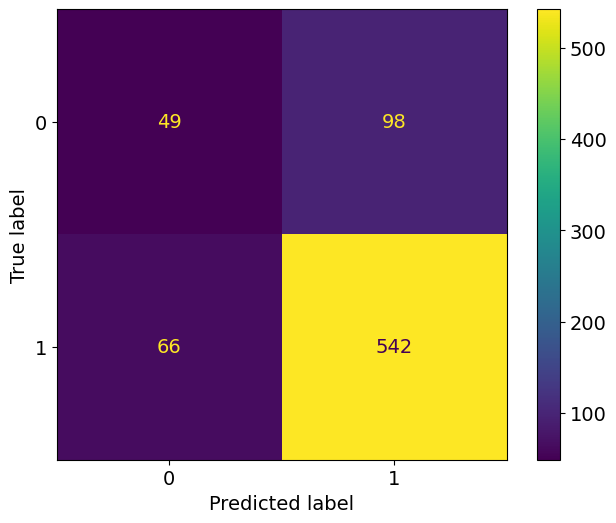

In [113]:
from numpy import size


y_pred_proba = model5.predict_proba(X_test)[:,1]
y_pred_proba
threshold = 0.7
y_pred = (y_pred_proba > threshold).astype(int)
print(size(y_test),size(y_pred))
acc = accuracy_score(y_test, y_pred)
print(acc)
prec = precision_score(y_test, y_pred)
print(prec)
rec = recall_score(y_test, y_pred,average='binary')
print(rec)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

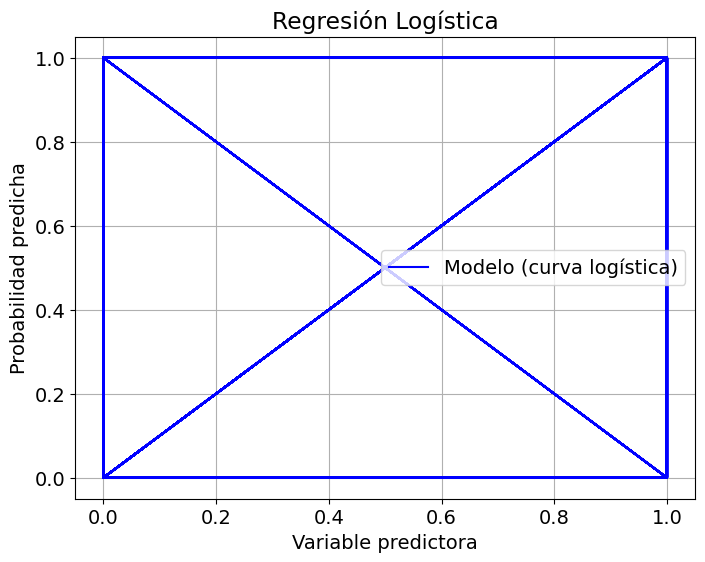

In [114]:
plt.figure(figsize=(8, 6))
plt.plot(y_test, y_pred, label="Modelo (curva logística)", color="blue")
plt.xlabel("Variable predictora")
plt.ylabel("Probabilidad predicha")
plt.title("Regresión Logística")
plt.legend()
plt.grid()
plt.show()